In [1]:
#setup, importing modules
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [2]:
#data
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

2024-03-14 12:40:32.685738: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 12:40:32.689737: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 12:40:32.739854: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 12:40:33.685759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [98]:
#functions
#greyscale



def grey_normalize_image(image,bins = 255):

    """ function for greyscaling in an image file, taking it's color histogram and normailizing it. """
    #greyscale
    greyed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #normalize
    hist = cv2.calcHist([greyed_image],[0],None,[bins],[0,256])
    normalized_hist = cv2.normalize(hist, hist, 0, 1.0, cv2.NORM_MINMAX)
    #squeeze a dimension out

    normalized_hist = np.squeeze(normalized_hist)


    return(normalized_hist)

def show_col_channels(img, bins = 255):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[bins],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,bins])
    plt.show()

def ch3_normalize_image(image,bins = 255):

    """ function for greyscaling in an image file, taking it's color histogram and normailizing it. """
    color_histogram_list = []
    for channel in range(0,3):

        #normalize
        hist = cv2.calcHist([image],[channel],None,[bins],[0,256])
        normalized_hist = cv2.normalize(hist, hist, 0, 1.0, cv2.NORM_MINMAX)
        #squeeze a dimension out
        normalized_hist = np.squeeze(normalized_hist)
        color_histogram_list.append(normalized_hist)
    
    #make it one array
    color_histogram = np.concatenate(np.array(color_histogram_list))


    return(color_histogram)


import matplotlib as mpl
# jimshow commisioned from utils
def jimshow(image, title=False):
    """imshow with matplotlib dependencies 
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']

    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    
    plt.figure(figsize=figsize)
    
    if depth == 1:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      
    if title:
        plt.title(title)
    plt.axis('off')
    
    plt.show()

def jimshow_channel(image, title=False):
    """
    Modified jimshow() to plot individual channels
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']

    height, width = image.shape
    figsize = width / float(dpi), height / float(dpi)
    
    plt.figure(figsize=figsize)
    
    plt.imshow(image, cmap='gray')
      
    if title:
        plt.title(title)
    plt.axis('off')
    
    plt.show()

In [47]:
X_train_normalized_grey =[]
for image in X_train:
    temp_norm_im = grey_normalize_image(image,bins=32)
    X_train_normalized_grey.append(temp_norm_im)

X_test_normalized_grey =[]
for image in X_test:
    temp_norm_im = grey_normalize_image(image,bins=32)
    X_test_normalized_grey.append(temp_norm_im)
    


In [153]:
X_train_ch3 =[]
for image in X_train:
    temp_norm_im = ch3_normalize_image(image,bins=64)
    temp_edges = detect_edges(image)
    X_temp_list = np.concatenate(np.array(temp_norm_im),np.array(temp_edges))
    X_train_ch3.append(X_temp_list)

X_test_ch3 =[]
for image in X_test:
    temp_norm_im = ch3_normalize_image(image,bins=64)
    X_test_ch3.append(temp_norm_im)

TypeError: only integer scalar arrays can be converted to a scalar index

In [48]:
classifier = LogisticRegression(random_state=42).fit(X_train_normalized_grey, y_train)
#predict
prediction = classifier.predict(X_test_normalized_grey)
#conf_matrix
cm = np.array2string(metrics.confusion_matrix(y_test,prediction))
#report
cr = metrics.classification_report(y_test, prediction)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [202]:
classifier = LogisticRegression(random_state=42).fit(X_train_ch3, y_train)
#predict
prediction = classifier.predict(X_test_ch3)
#conf_matrix
cm = np.array2string(metrics.confusion_matrix(y_test,prediction))
#report
cr = metrics.classification_report(y_test, prediction)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [83]:
f = open('../out/log_ch3_big_report.txt', 'w')
f.write('Logistic Classifier output\n\nClassification Report\n\n{}\n\nConfusion Matrix\n\n{}\n'.format(cr, cm))
f.close()

In [151]:
len(X_train_ch3[2])

192

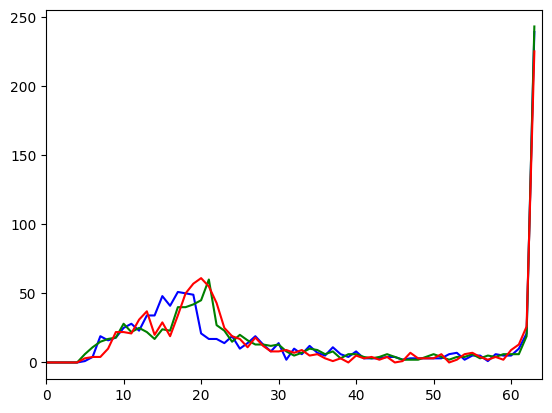

In [87]:
show_col_channels(X_train[2],bins=64)

In [143]:
def detect_edges(image):
    #blur it?
    hm = cv2.medianBlur(image, 7)
    #gray it?
    test = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)

    ## SOBEL KERNELS
    sobel_horizontal = cv2.Sobel(test, cv2.CV_64F, 1, 0)
    sobel_vertical = cv2.Sobel(test, cv2.CV_64F, 0, 1)

    sobel_horizontal_2 = np.uint8(np.absolute(sobel_horizontal))
    sobel_vertical_2 = np.uint8(np.absolute(sobel_vertical))
    #add up the two
    abs_grad_x = cv2.convertScaleAbs(sobel_horizontal_2)
    abs_grad_y = cv2.convertScaleAbs(sobel_vertical_2)
    
    
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    grad_1D = np.concatenate(grad)

    return(grad_1D)



In [201]:

##### EZHJOOOOO
X_train_ch3 =[]
for image in X_train:
    temp_X = []
    temp_norm_im = ch3_normalize_image(image,bins=64)
    temp_edges = detect_edges(image)

    temp_X.append(temp_norm_im)
    temp_X.append(temp_edges)
    temp_X = np.concatenate(temp_X)


    X_train_ch3.append(temp_X)

X_test_ch3 =[]
for image in X_test:
    temp_X = []
    temp_norm_im = ch3_normalize_image(image,bins=64)
    temp_edges = detect_edges(image)

    temp_X.append(temp_norm_im)
    temp_X.append(temp_edges)
    temp_X = np.concatenate(temp_X)


    X_test_ch3.append(temp_X)

In [180]:
temp_X = []
temp_norm_im = ch3_normalize_image(X_train[0],bins=64)
temp_edges = detect_edges(X_train[0])

temp_X.append(temp_norm_im)
temp_X.append(temp_edges)

In [171]:
#blur it?
hm = cv2.medianBlur(X_train[0], 7)
    #gray it?
test = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)
    ## SOBEL KERNELS
sobel_horizontal = cv2.Sobel(test, cv2.CV_64F, 1, 0)
sobel_vertical = cv2.Sobel(test, cv2.CV_64F, 0, 1)

sobel_horizontal_2 = np.uint8(np.absolute(sobel_horizontal))
sobel_vertical_2 = np.uint8(np.absolute(sobel_vertical))
#add up the two
abs_grad_x = cv2.convertScaleAbs(sobel_horizontal_2)
abs_grad_y = cv2.convertScaleAbs(sobel_vertical_2)
    
    
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
grad_1D = np.concatenate(grad)

test = detect_edges(X_train[0])

0.022727273